## Observations and Insights 

In [28]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

all_data_df = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview

all_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.

mice_number = all_data_df["Mouse ID"].value_counts()
len(mice_number)

249

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mice = all_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)



In [31]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_mice_ID = all_data_df.loc[duplicated_mice, 'Mouse ID'].unique()

duplicated_mice_ID

dup_mice_df = all_data_df.loc[all_data_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = all_data_df[all_data_df['Mouse ID'].isin(duplicated_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_df['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df["Tumour Volume (mm3)"].groupby(clean_df['Drug Regimen']).mean()
median = clean_df["Tumour Volume (mm3)"].groupby(clean_df['Drug Regimen']).median()
variance = clean_df["Tumour Volume (mm3)"].groupby(clean_df['Drug Regimen']).var()
stddev = clean_df["Tumour Volume (mm3)"].groupby(clean_df['Drug Regimen']).std()
sem = clean_df["Tumour Volume (mm3)"].groupby(clean_df['Drug Regimen']).sem()

summary = pd.DataFrame({
    "Mean Tumour Vol": mean,
    "Median Tumour Vol": median,
    "Tumour Vol Variance": variance,
    "Tumour Vol Std Dev": stddev,
    "Tumour Vol SEM": sem
})

summary

,Mean Tumour Vol,Median Tumour Vol,Tumour Vol Variance,Tumour Vol Std Dev,Tumour Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumour Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

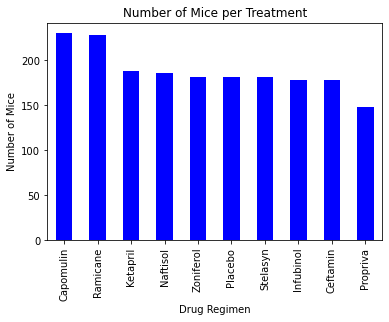

In [37]:
plot_pandas = mice_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

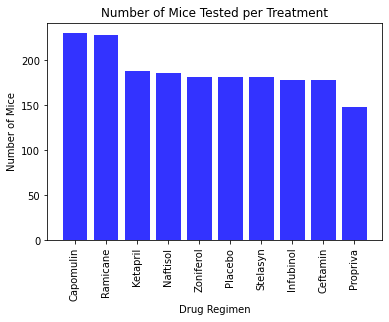

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


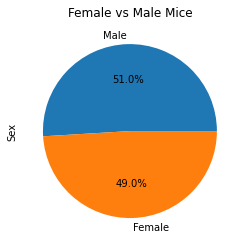

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

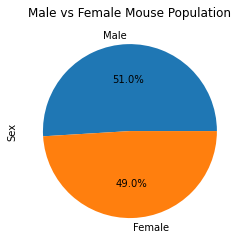

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_df[clean_df["Drug Regimen"].isin(drug_list)]
drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [42]:
# Start by getting the last (greatest) timepoint for each mouse
drugs = drugs.groupby(["Drug Regimen", "Mouse ID",])["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
drugs = pd.merge(drugs, clean_df[["Mouse ID", "Timepoint", "Tumour Volume (mm3)"]], on=["Mouse ID", "Timepoint"], how="left")
drugs

,Drug Regimen,Mouse ID,Timepoint,Tumour Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments
    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [44]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0, 0.5, 'Tumour Volume (mm3)')

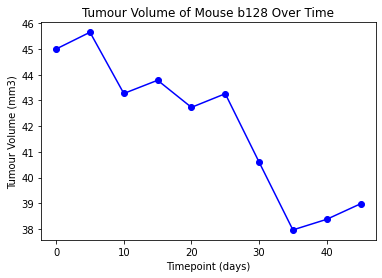

In [59]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
mouse_cap = clean_df.loc[clean_df["Mouse ID"]=='b128',:]
x_axis = mouse_cap["Timepoint"].count()
plt.plot(mouse_cap["Timepoint"], mouse_cap["Tumour Volume (mm3)"], marker="o", color="b")
plt.title("Tumour Volume of Mouse b128 Over Time")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumour Volume (mm3)")

Text(0, 0.5, 'Average Tumour Volume (mm3)')

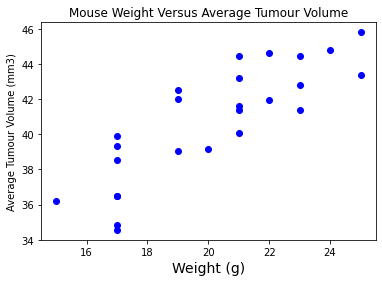

In [46]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_cap_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumour Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumour Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumour Volume (mm3)')

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

corr = round(st.pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumour Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumour volume is {corr}")

The correlation between mouse weight and average tumour volume is 0.84


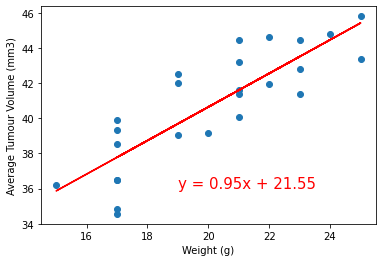

In [51]:
x_values = avg_cap_vol['Weight (g)']
y_values = avg_cap_vol['Tumour Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()